In [22]:
import h5py
import numpy as np
from matplotlib import pyplot as plt


In [7]:
fname = '/media/student1/NewVolume/MR_Reconstruction/datasets/fastmri/singlecoil_train/file1001062.h5'
hf = h5py.File(fname)
print('Keys:',list(hf.keys()))

Keys: ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']


/home/student1/anaconda3/envs/fastmri/lib/python3.6/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [12]:
use_seed = True
seed = None if not use_seed else tuple(map(ord, fname))
tuple(map(ord,fname))

(47,
 109,
 101,
 100,
 105,
 97,
 47,
 115,
 116,
 117,
 100,
 101,
 110,
 116,
 49,
 47,
 78,
 101,
 119,
 86,
 111,
 108,
 117,
 109,
 101,
 47,
 77,
 82,
 95,
 82,
 101,
 99,
 111,
 110,
 115,
 116,
 114,
 117,
 99,
 116,
 105,
 111,
 110,
 47,
 100,
 97,
 116,
 97,
 115,
 101,
 116,
 115,
 47,
 102,
 97,
 115,
 116,
 109,
 114,
 105,
 47,
 115,
 105,
 110,
 103,
 108,
 101,
 99,
 111,
 105,
 108,
 95,
 116,
 114,
 97,
 105,
 110,
 47,
 102,
 105,
 108,
 101,
 49,
 48,
 48,
 49,
 48,
 54,
 50,
 46,
 104,
 53)

In [21]:
for i in range(len(seed)):
    print(chr(seed[i]))

/
m
e
d
i
a
/
s
t
u
d
e
n
t
1
/
N
e
w
V
o
l
u
m
e
/
M
R
_
R
e
c
o
n
s
t
r
u
c
t
i
o
n
/
d
a
t
a
s
e
t
s
/
f
a
s
t
m
r
i
/
s
i
n
g
l
e
c
o
i
l
_
t
r
a
i
n
/
f
i
l
e
1
0
0
1
0
6
2
.
h
5


In [20]:
seed[i] for i in range(3)

SyntaxError: invalid syntax (<ipython-input-20-f9e5a8a9f036>, line 1)

In [4]:
hf.attrs['norm']

0.05345318642238667

In [3]:
volume_kspace=hf['kspace']
print(volume_kspace.dtype)
print(volume_kspace.shape)

complex64
(36, 640, 372)


In [4]:
volume_kspace[2].shape

(640, 372)

In [5]:
def show_kspace(slice_kspace,slice_nums,cmap=None):
#     print(slice_kspace.shape)
    fig=plt.figure()
    for i,num in enumerate(slice_nums):
        plt.subplot(1,len(slice_nums),i+1)
        data=slice_kspace[num]
        
        data=np.log(np.abs(data)+1e-9)  ## imp !!
#         print(data.shape)
        plt.imshow(data,cmap=cmap)

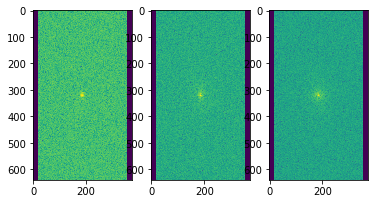

In [26]:
show_kspace(volume_kspace,[0,5,10])  #this shows slice 0,5,10

In [7]:
from data import transforms as T

In [8]:
def show_image(slice_kspace,slice_nums,cmap=None):
#     print(slice_kspace.shape)
    fig=plt.figure()
    for i,num in enumerate(slice_nums):
        
        plt.subplot(1,len(slice_nums),i+1)
        volume_kspace2 = T.to_tensor(slice_kspace[num,:,:])
#         print("volume_kspace2",volume_kspace2.shape)

        slice_image = T.ifft2(volume_kspace2)
#         print("slice_image",slice_image.shape)
        
        slice_image_abs = T.complex_abs(slice_image)
#         print(slice_image_abs.shape)
        plt.imshow(slice_image_abs,cmap=cmap)

In [9]:
volume_kspace.shape

(36, 640, 372)

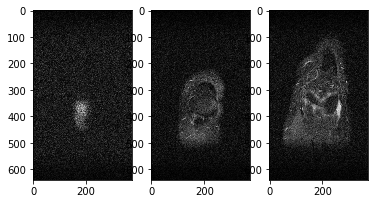

In [25]:
show_image(volume_kspace,[0,5,10],cmap='gray')

In [11]:
from common.subsample import MaskFunc
mask_func = MaskFunc(center_fractions=[0.04],accelerations=[8])

In [13]:
masked_kspace,mask = T.apply_mask(T.to_tensor(volume_kspace[10,:,:]),mask_func)

shape= [640 372   2]


In [14]:
masked_kspace.shape

torch.Size([640, 372, 2])

In [20]:
sampled_image = T.ifft2(masked_kspace)

In [21]:
sampled_image_abs = T.complex_abs(sampled_image)

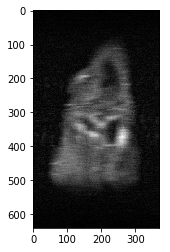

In [24]:
plt.imshow(np.abs(sampled_image_abs.numpy()),cmap='gray')


In [27]:
print(volume_kspace[0,:,:])

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]
